This notebook shows you how to use Pandas from Python to analyze epidemic data. We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-04-25 12:11:03--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.198.83, 13.227.198.44, 13.227.198.98, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.198.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 605131 (591K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx’

COVID-19-geographic 100%[===================>] 590.95K  --.-KB/s    in 0.1s    

2020-04-25 12:11:04 (5.45 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ saved [605131/605131]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe `df` directly from the downloaded Excel file and have a look at the first 10 lines for format.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-24,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-23,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-22,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-21,21,4,2020,35,2,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-20,20,4,2020,88,3,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-04-19,19,4,2020,63,0,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-04-18,18,4,2020,51,1,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-04-17,17,4,2020,10,4,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-04-16,16,4,2020,70,2,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-04-15,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0,Asia


Use a `count` on columns to see how many missing values we have. We would like to analyze countries by `geoId`.

In [4]:
df.count()

dateRep                    12801
day                        12801
month                      12801
year                       12801
cases                      12801
deaths                     12801
countriesAndTerritories    12801
geoId                      12760
countryterritoryCode       12664
popData2018                12694
continentExp               12801
dtype: int64

Because we seem to miss some `geoId` entries, we will drop those lines using `dropna`. The resulting dataframe is pivoted so we get one row per date in `dateRep`, columns by `geoId` and the number of new `cases` and `deaths` for that date and country in the cells. Again, show the first 10 rows from our new dataframe `df_geo` to check the result of our `pivot`.

In [5]:
df_geo = df.dropna().pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo.head(10)

cases                                           ... deaths          \
geoId         AD   AE   AF  AG  AL   AM  AO  AR   AT   AU  ...     VC  VE  VG   
dateRep                                                    ...                  
2019-12-31   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-05   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-06   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-07   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-08   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-09   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
dateRep                                  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-05 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-06 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-07 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-08 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-09 NaN  0.0 NaN NaN NaN NaN NaN  

[10 rows x 400 columns]

Looking good, lots of missing values, meaning there's no data for that country on the current date. We can describe the columns to get an idea of what's there.

In [6]:
df_geo.describe()

cases                                                            \
geoId         AD          AE          AF         AG         AL          AM   
count  42.000000  110.000000  106.000000  36.000000  47.000000  107.000000   
mean   17.238095   79.600000   12.084906   0.666667  14.106383   14.915888   
std    12.619786  158.562534   22.859454   1.414214   8.367208   23.143165   
min     0.000000    0.000000    0.000000   0.000000   0.000000    0.000000   
25%     8.000000    0.000000    0.000000   0.000000   7.500000    0.000000   
50%    15.000000    0.000000    0.000000   0.000000  13.000000    0.000000   
75%    25.000000   24.250000   10.000000   0.250000  21.000000   27.000000   
max    43.000000  518.000000  105.000000   6.000000  29.000000   92.000000   

                                                       ... deaths             \
geoId         AO          AR           AT          AU  ...     VC         VE   
count  34.000000   49.000000   116.000000  116.000000  ...   32.0  41.000000   
mean    0.735294   69.857143   129.181034   57.474138  ...    0.0   0.243902   
std     1.262725   56.853613   226.491370  119.692683  ...    0.0   0.582258   
min     0.000000    0.000000     0.000000    0.000000  ...    0.0   0.000000   
25%     0.000000   11.000000     0.000000    0.000000  ...    0.0   0.000000   
50%     0.000000   74.000000     1.000000    2.000000  ...    0.0   0.000000   
75%     1.000000  103.000000   155.250000   50.250000  ...    0.0   0.000000   
max     5.000000  186.000000  1141.000000  611.000000  ...    0.0   2.000000   

                                                                           \
geoId         VG         VI     VN         XK    YE         ZA         ZM   
count  29.000000  31.000000  112.0  40.000000  15.0  48.000000  37.000000   
mean    0.034483   0.096774    0.0   0.475000   0.0   1.562500   0.081081   
std     0.185695   0.300537    0.0   0.876693   0.0   2.894648   0.276725   
min     0.000000   0.000000    0.0   0.000000   0.0   0.000000   0.000000   
25%     0.000000   0.000000    0.0   0.000000   0.0   0.000000   0.000000   
50%     0.000000   0.000000    0.0   0.000000   0.0   0.000000   0.000000   
75%     0.000000   0.000000    0.0   1.000000   0.0   2.000000   0.000000   
max     1.000000   1.000000    0.0   3.000000   0.0  14.000000   1.000000   

                  
geoId         ZW  
count  35.000000  
mean    0.085714  
std     0.284029  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     0.000000  
max     1.000000  

[8 rows x 400 columns]

Get to know your data by visualization, in this case the number of new `cases` per day for my home country __NL__.

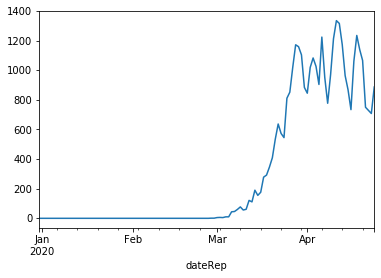

In [7]:
df_geo['cases']['NL'].plot()

Because of the pivoted data format it is just as easy to look at the number of `deaths`.

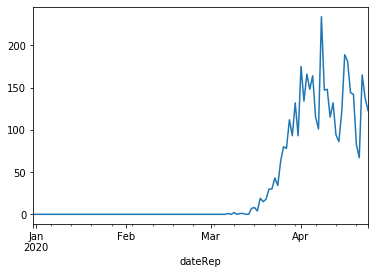

In [8]:
df_geo['deaths']['NL'].plot()

What would China look like?

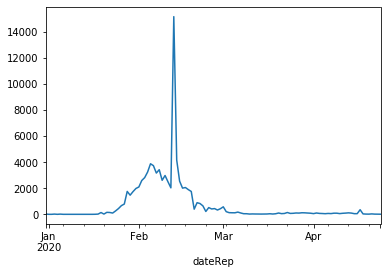

In [9]:
df_geo['cases']['CN'].plot()

The big spike in the middle was a change in counting, where they decided to count an extra 15000 cases. When was that? We select lines for `cases` in __CN__ above 2500 and show the actual number.

In [10]:
df_geo[df_geo['cases']['CN'] > 2500]['cases']['CN']

dateRep
2020-02-02     2590.0
2020-02-03     2812.0
2020-02-04     3237.0
2020-02-05     3872.0
2020-02-06     3727.0
2020-02-07     3160.0
2020-02-08     3418.0
2020-02-09     2607.0
2020-02-10     2974.0
2020-02-13    15141.0
2020-02-14     4156.0
2020-02-15     2538.0
Name: CN, dtype: float64

So what does the original record look like? We select the full record for `geoId` __CN__ and the correct date.

In [11]:
df[(df['geoId'] == 'CN') & (df['dateRep'] == '2020-02-13')]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
2575,2020-02-13,13,2,2020,15141,254,China,CN,CHN,1.392730e+09,Asia


To see the growth in number of cases, we use a cumulative sum with `cumsum`, in this case we show __CN__ and __NL__.

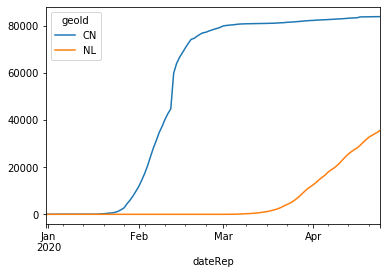

In [12]:
df_geo['cases'][['CN', 'NL']].cumsum().plot()

Because of the large difference in numbers, it may help to use a logarithmic scale. We can change the data passed to the plot using the `log10` function from NumPy. This will generate some warnings because `cases` can be zero.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


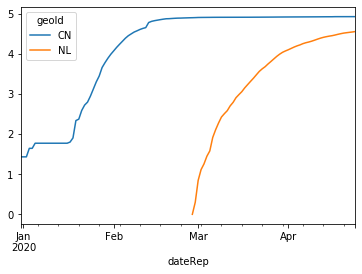

In [13]:
np.log10(df_geo['cases'][['CN', 'NL']].cumsum()).plot()

Alternatively, we ask `plot` to use a logarithmic scale.

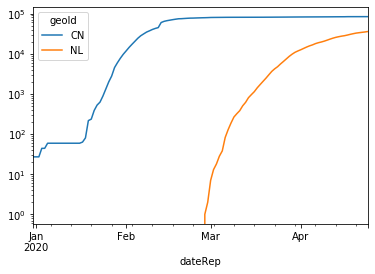

In [14]:
df_geo['cases'][['CN', 'NL']].cumsum().plot(logy=True)

This clearly shows the phases in __CN__, first some external infections, then an incubation period, then the internal infections take off. Measures like isolation and social distancing seem to work, the curve flattens and stabilizes. For __NL__ we are still at the phase where measures start to take effect. Also, no real startup curve there.

Perhaps some other countries also show this effect.

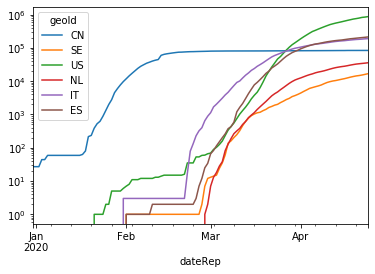

In [15]:
df_geo['cases'][['CN', 'SE', 'US', 'NL', 'IT', 'ES']].cumsum().plot(logy=True)

Another interesting measure would be relative growth in total number of cases per day. Therefore we need to divide the current day by the previous one, easily implemented by dividing the dataframe by the same dataframe shifted one row. Note that we are now only showing data from March 16 onwards, as specified by the `loc` method.

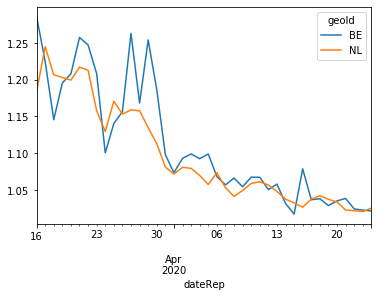

In [16]:
(df_geo.cumsum() / df_geo.shift().cumsum())['cases'][['BE', 'NL']].loc['20200316':].plot()

From this factor (relative increase in cases since yesterday) we can calculate the number of days to double the total amount of cases by some logarithmic magic. For __NL__ the number doubled every one or two days in the beginning but now it doubles in over 14 days, which is a good sign. If this number keeps rising we will never get to the point where it doubles again.

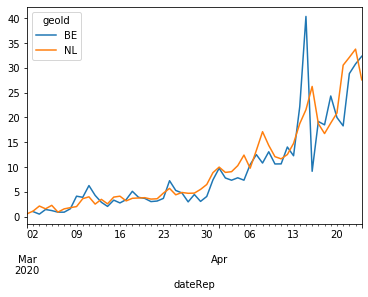

In [17]:
(np.log10(2) / np.log10(df_geo.cumsum() / df_geo.shift().cumsum()))['cases'][['BE', 'NL']].loc['20200301':].plot()

Rolling window functions can be used to smooth a curve, in this case the `rolling` 7 day `mean` new cases for __BE__ and __NL__.

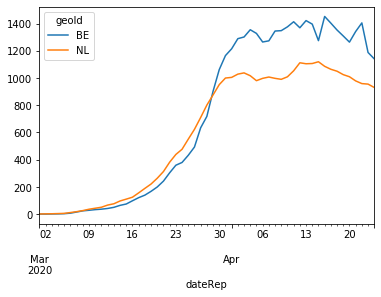

In [18]:
df_geo['cases'][['BE', 'NL']].rolling(7).mean().loc['20200301':].plot()

The default window function is a rectangle (called `boxcar`), where all values are weighed equally. Using another window function will weigh the values in the window differently, such as a gaussian function which will focus more on the recent values in the window, with a specified standard deviation as `std` in the `mean` aggregate function.

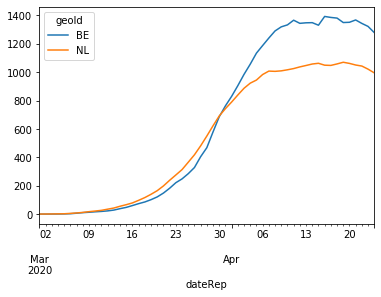

In [19]:
df_geo['cases'][['BE', 'NL']].rolling(14, win_type='gaussian').mean(std=7).loc['20200301':].plot()

Now let's have a look at _the curve_ which we are supposed to flatten. It shows the number of active cases (the _infected_ category in the SIR model). We assume that an infection lasts 14 days on average (which is under discussion, currently the last 14 days is used by EU CDC), so we only look at new cases from the last 14 days. By leaving out older infections (the _removed_ category in SIR) this shows us the current number of active infections. China is clearly through their (first) curve. Italy and Spain seem to be over the top and so is France. We use a `sum` function to aggregate cases over the 14 day window.

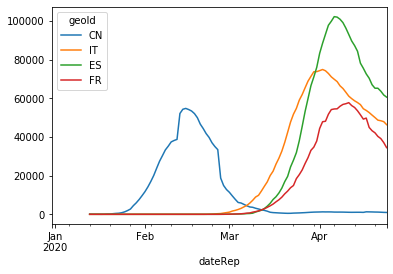

In [20]:
df_geo['cases'][['CN', 'IT', 'ES', 'FR']].rolling(14).sum().plot()

Assuming that we see about 10% of currently infected in Intensive Care, we can monitor the capacity with the following graph.

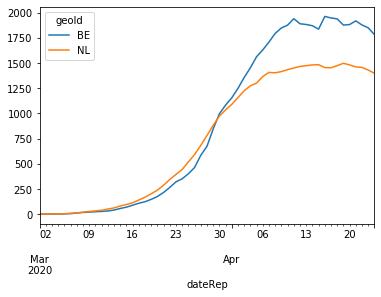

In [21]:
(df_geo['cases'][['BE', 'NL']].rolling(14).sum().loc['20200301':] * 0.1).plot()

For __NL__ this more or less corresponds with the official ICU data. We don't clearly see the published drop in number of current patients yet, that is probably offset by an increase in testing, so we may have to gradually lower the percentage.

In [22]:
(df_geo['cases'][['BE', 'NL']].rolling(14).sum().loc['20200301':] * 0.1).tail(14)

geoId,BE,NL
dateRep,,
2020-04-11,1938.3,1449.4
2020-04-12,1888.4,1465.1
2020-04-13,1881.1,1472.1
2020-04-14,1869.0,1480.1
2020-04-15,1834.4,1482.4
2020-04-16,1960.9,1453.9
2020-04-17,1946.1,1451.7
2020-04-18,1936.8,1472.6
2020-04-19,1875.2,1496.2


The structure of our dataframe lends itself to analyzing all kinds of measures. What about infection rate? The example below gives the average number of cases for last week divided by the infectious cases a week before, an approximation of the famous `R` measure.

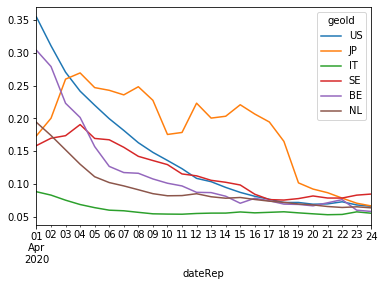

In [23]:
(df_geo.rolling(7).mean() / df_geo.shift(7).rolling(14).sum())['cases'][['US', 'JP', 'IT', 'SE', 'BE', 'NL']].loc['20200401':].plot()

Or what about the number of deaths in the week before as part of the number of active cases in the week before that? In other words, an estimate of the death rate.

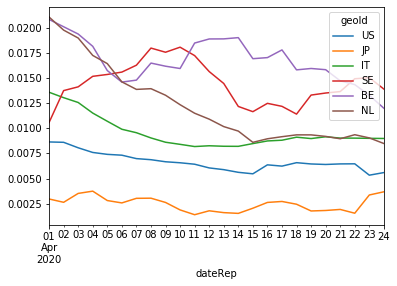

In [24]:
(df_geo.rolling(7).mean()['deaths'] / df_geo.shift(7).rolling(14).sum()['cases'])[['US', 'JP', 'IT', 'SE', 'BE', 'NL']].loc['20200401':].plot()

Instead of plotting you can also use aggregate functions at the end, such as `mean`.

In [25]:
(df_geo.rolling(7).mean()['deaths'] / df_geo.shift(7).rolling(14).sum()['cases'])[['US', 'JP', 'IT', 'SE', 'BE', 'NL']].loc['20200401':].mean()

geoId
US    0.006670
JP    0.002469
IT    0.009543
SE    0.014409
BE    0.016704
NL    0.012256
dtype: float64

Keep exploring! Stay home, wash your hands, keep your distance.